In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from utils import get_mean_std

In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
    ])

train_set = torchvision.datasets.CIFAR10(
    root='./data/',
    train=True,
    download=True,
    transform = transform
    )

test_set = torchvision.datasets.CIFAR10(
    root='./data/',
    train=False,
    download=True,
    transform = transform
    )

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64)

In [4]:
# per-channel mean and std of CIFAR-10 dataset 
mean, std = get_mean_std(train_loader)
print(f'mean:\t{mean}\nstd:\t{std}')


mean:	tensor([0.4915, 0.4822, 0.4466])
std:	tensor([0.2470, 0.2435, 0.2616])


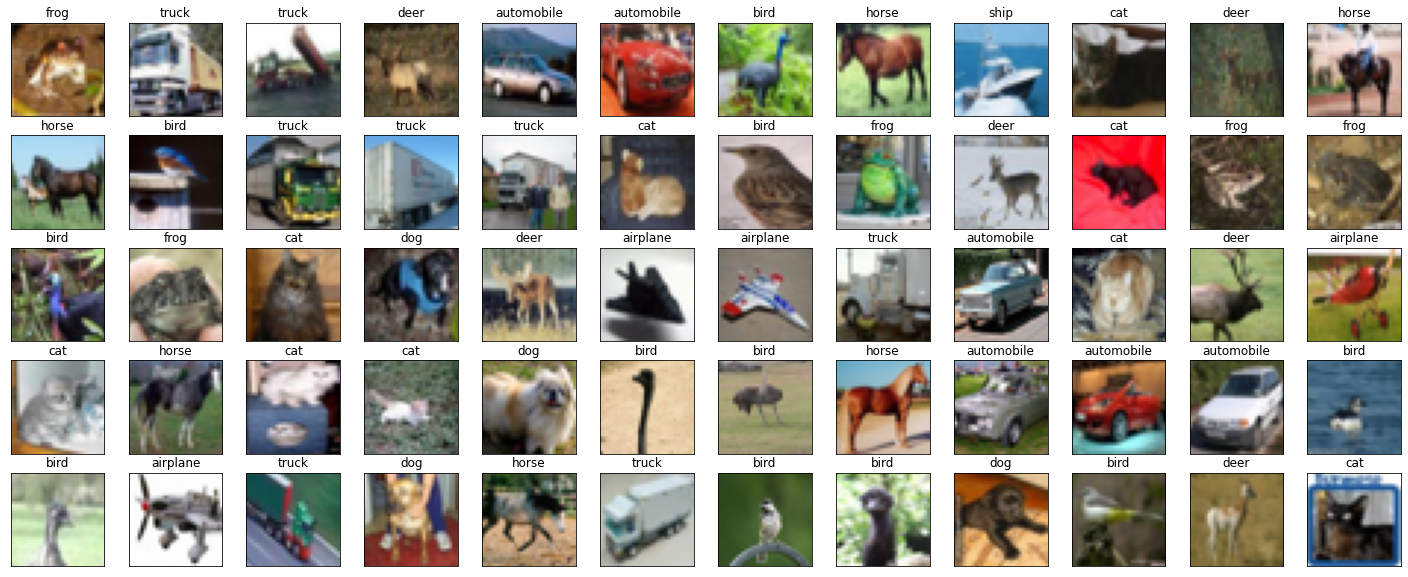

In [9]:
# obtain one batch of training images
images, labels = next(iter(train_loader))
images = images.numpy()

# plot the images in the batch, along with corresponding labels
fig = plt.figure(figsize=(25, 10))
for i in np.arange(60):
    ax = fig.add_subplot(5, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(np.transpose(images[i], (1, 2, 0))))  # B*C*H*W --> H*W*C
    ax.set_title(train_set.classes[labels[i].item()])

plt.show()
fig.savefig('visualizations/train_samples.png', bbox_inches='tight')
plt.close()

In [10]:
len(train_set)

50000

In [11]:
len(test_set)

10000

In [12]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [15]:
torch.as_tensor(train_set.targets)  # tensor with correct class labels for train_set
# train_set.targets will return a rank 1 list with 50000 elements i.e., the indices of correct label

tensor([6, 9, 9,  ..., 9, 1, 1])

In [16]:
torch.as_tensor(test_set.targets)  # tensor with correct class labels for test_set
# test_set.targets will return a rank 1 list with 10000 elements i.e., the indices of correct label

tensor([3, 8, 8,  ..., 5, 1, 7])

In [17]:
torch.as_tensor(train_set.targets).bincount()  # frequency of each class in train_set

tensor([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

In [18]:
torch.as_tensor(test_set.targets).bincount()  # frequency of each class in test_set

tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])